# Chapter 3: Structural Optimization

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt

from Chapter03_StructuralOptimization_functions import (truss1x1,truss1x2,truss2x2,
                                                         PlaneStressCantilever, PlaneStressMBBBeam)

print('Setup complete!')

Setup complete!


## Pick a truss example

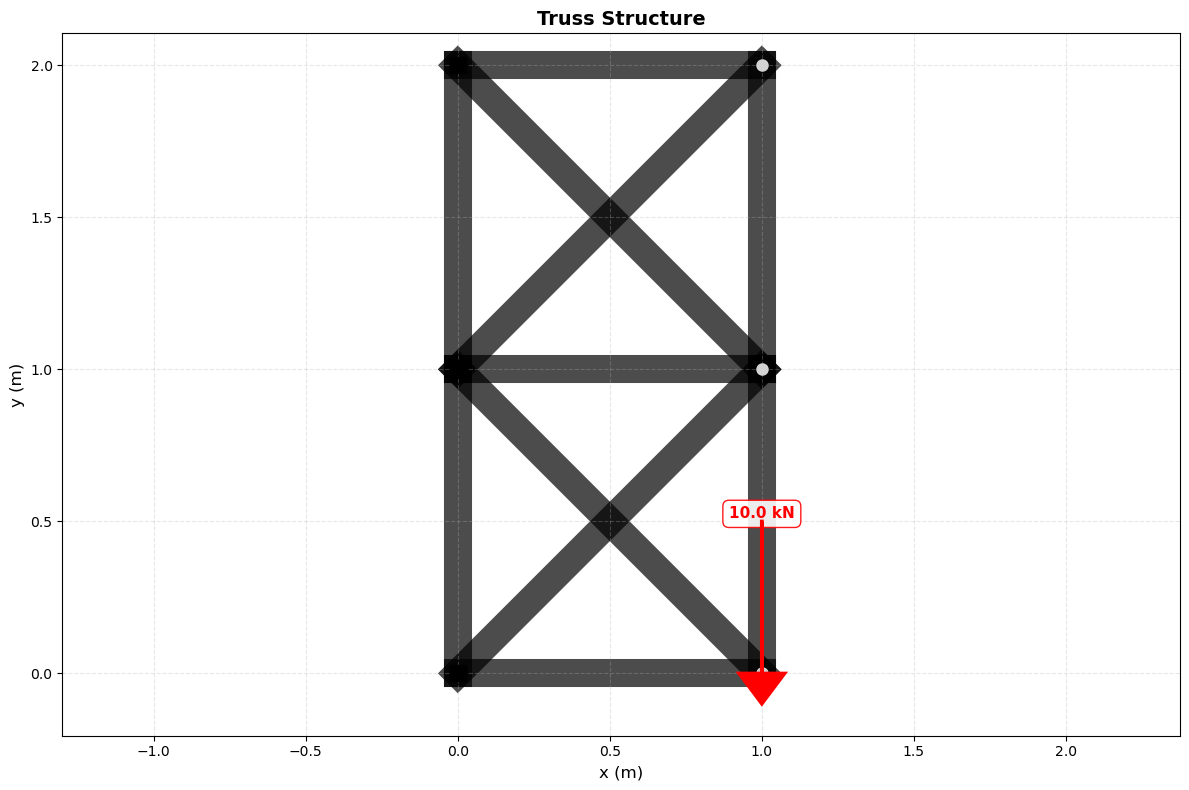

In [2]:
fem_model= truss1x2() 
fem_model.plot_truss()

## Solving and plotting deformed truss

Design valid? True
Max displacement: 1.354e-07 m


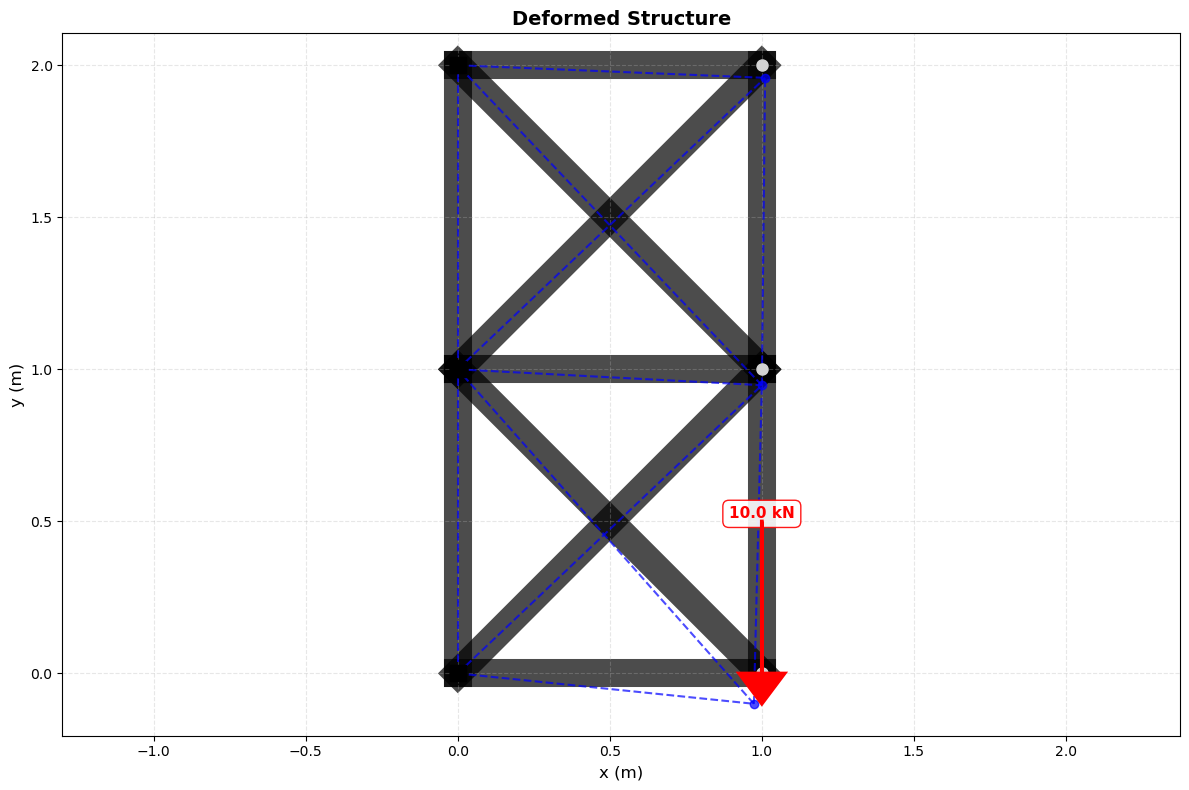

In [3]:
# Solve FEM for full design
d, valid = fem_model.solve()

print(f"Design valid? {valid}")
print(f"Max displacement: {abs(d).max():.3e} m")

# plot deformed truss
fem_model.plot_truss(displacements=d, 
                    title="Deformed Structure")


## Evaluating the metrics

In [4]:
# Design constraints

metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)

  Volume: 6.33 m^3
  Max displacement: 1.3536e-04 m
  Max stress: 1.29e-02 Pa
  Compliance: 1.35e-03 J
  Feasible: True


## Optimization using 

Starting optimization (Target Volume: 1.5821 m^3)...
Optimization successful.
  Volume: 1.58 m^3
  Max displacement: 2.8443e-04 m
  Max stress: 1.90e-02 Pa
  Compliance: 2.84e-03 J
  Feasible: True


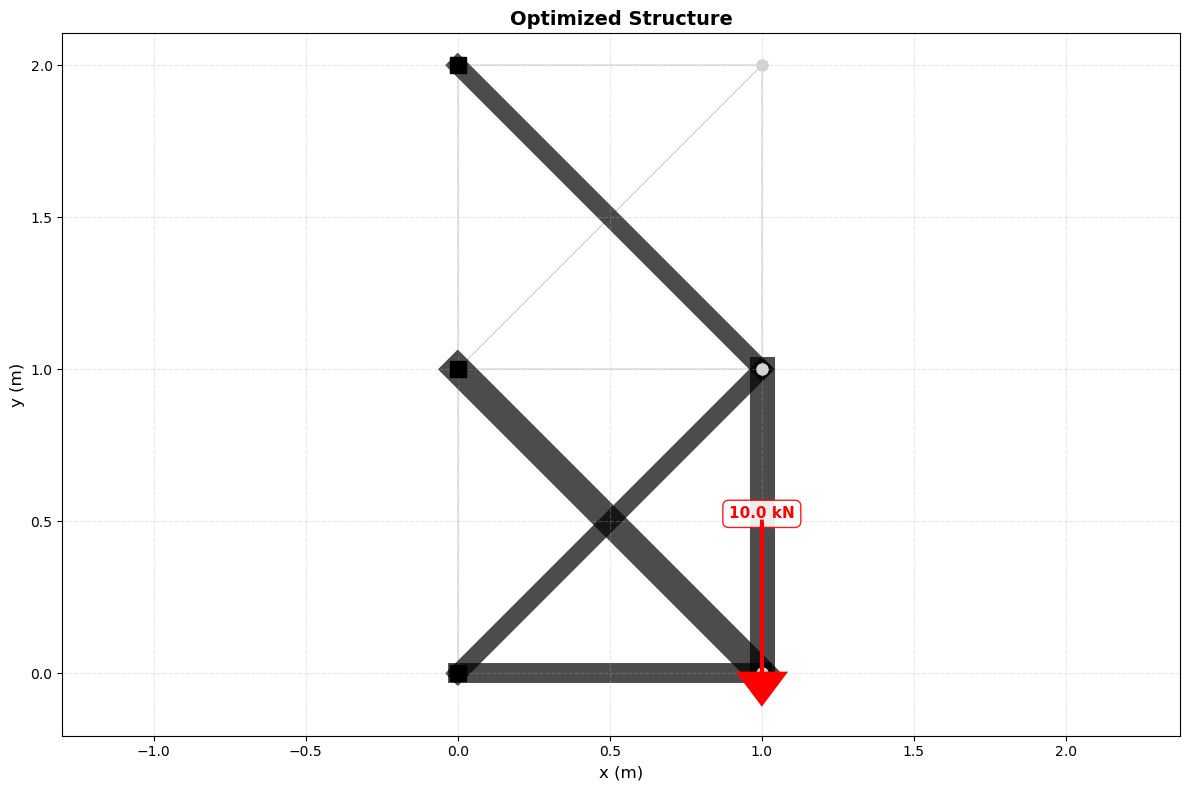

In [5]:
result = fem_model.optimize_areas(volume_fraction = 0.25)

fem_model.A = result.x
metrics = fem_model.evaluate_design()
fem_model.print_metrics(metrics)
fem_model.plot_truss(title="Optimized Structure")

## Plane stress example

<Axes: title={'center': 'Cantilever Problem'}, xlabel='x', ylabel='y'>

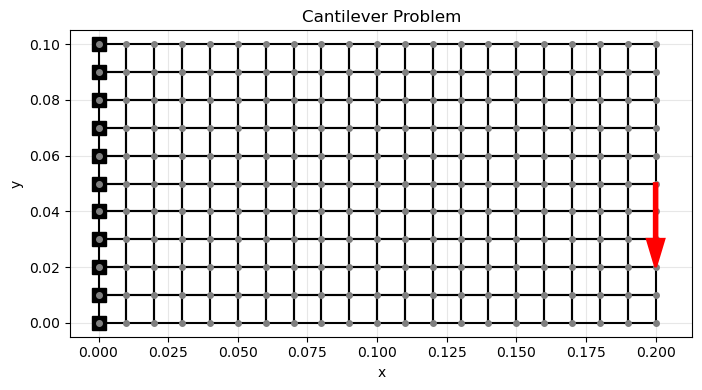

In [7]:

fea2d = PlaneStressCantilever(nx=20, ny=10,)
fea2d.plot_mesh(title="Cantilever Problem")


## Solve Plane stress

  Compliance: 3.8602e-05
  Volume: 2.0000e-02
  Volume fraction: 1.0000
  Feasible: True


<Axes: title={'center': 'Deformed Shape (scale=5.2e+02)'}, xlabel='x', ylabel='y'>

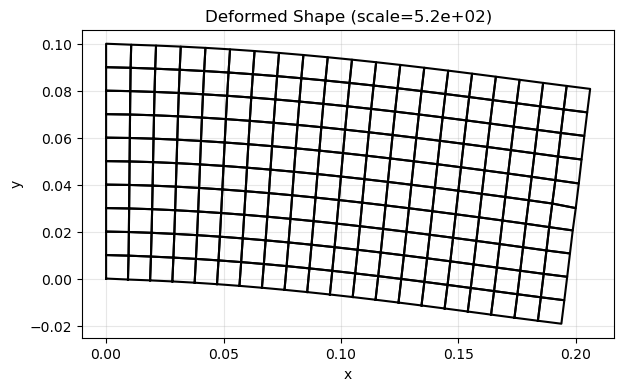

In [8]:

U, valid = fea2d.solve()
metrics = fea2d.evaluate_design()
fea2d.print_metrics(metrics)

fea2d.plot_displacement()